# Crescimento de Regiões

## Introdução

> 

## Implementação

In [52]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt
import math
from IPython.display import Image

In [53]:
def GrowRegs(img, sX, sY, mode="" , steps=1):
    iteration = 0    
    Aimg = img.copy() #Matrix A: Original Image
    Bgroups = np.zeros(img.shape, dtype="uint8") #Matrix B: Pixel Group Info Bgroups[k]-Bgroups[k-1]=contours
    #Dval = 2 #+- pixel intensity value   
    status = 0
    #Equal dimensions in seeds
    if len(sX) != len(sY):
        print("Error in seedX / seedY !")
        return 0,0,0
    
    seedstatus = [1]*len(sX) #1 == OK; 0== DONE
    
    for seed in range(len(sX)): #For each seed
        x = sX[seed]
        y = sY[seed]       
        Bgroups[x,y] = seed+1 #Assigns the seed to the group
        
    if mode == 'FULL':    
        plt.imshow(Bgroups)
        plt.show()
    
    while sum(seedstatus) != 0:
        iteration = iteration + 1
        for seed in range(len(sX)): #For each seed
            if seedstatus[seed] == 1:
                x = sX[seed]
                y = sY[seed]   
                Bgroups, status = ExpandRegion(Aimg, Bgroups, x, y, seed, iteration)
                seedstatus[seed] = status
                
        if iteration%steps == 0 and mode == 'FULL':    
            plt.imshow(Bgroups)
            plt.show()
            
    print("Iterations: {}".format(iteration))
    return Bgroups

In [54]:
def ExpandRegion(Aimg, Bgroups, x, y, seed, iteration):
    Irows, Icols = img.shape
    Dval = 2 #+- pixel intensity value
    threshold = Aimg[x,y]
    status = 0 #status = DONE -> It cannot grow any more. This statement needs to be tested:
    for i in range(x-iteration, x+iteration+1): #Inspect the neighborhood
        for j in range(y-iteration, y+iteration+1):
            if i >= 0 and i < Irows:        #Tests whether the pixels are
                if j >= 0 and j < Icols:    #contained in the image dimensions.
                    if Bgroups[i,j] == 0: #If it do not belo ng to another group / region                        
                        if Aimg[i,j] >= (threshold-Dval) and Aimg[i,j] <= (threshold+Dval): #If it is within the threshold
                            #Connectivity
                            for ii in [-1,0,1]:
                                for jj in [-1,0,1]:
                                    if i+ii >= 0 and i+ii < Irows:
                                        if j+jj >= 0 and j+jj <Icols:
                                            if Bgroups[i+ii,j+jj] == seed+1:
                                                status = 1
                                                Bgroups[i,j] = seed+1 #Seed value group

                            #Bgroups[i,j] = seed+1 #Seed value group                          
    return Bgroups, status

### Teste 1

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 255 255 255   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 255 255 255   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 255 255 255   0   0   0   0 255 255 255   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0 255 255 255   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255 255 255   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255 255 255   0 

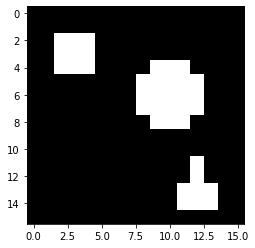

255


In [55]:
img = cv.imread("../gcPDI2/imgPDI2/Test.tiff",0)
print(img)
plt.imshow(img,'gray')
plt.show()
print(img[3][3])

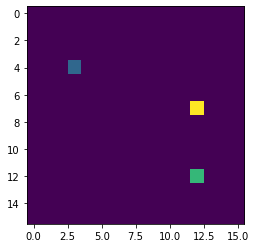

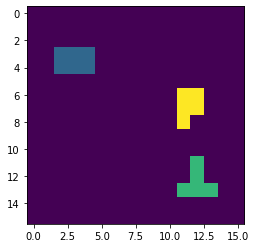

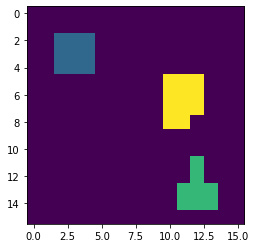

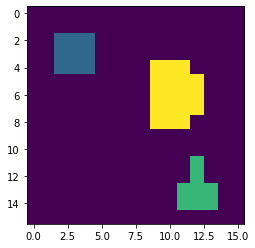

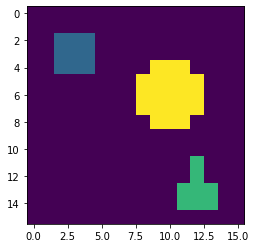

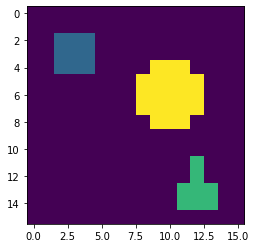

Iterations: 5


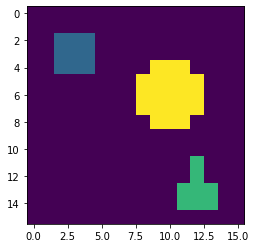

In [56]:
#3 points
seedX=[4,12,7]
seedY=[3,12,12]
Result = GrowRegs(img, seedX, seedY, mode='FULL')
print(Result)
plt.imshow(Result)
plt.show()

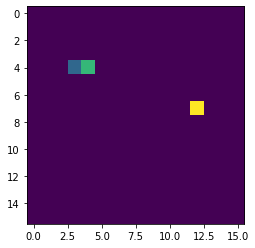

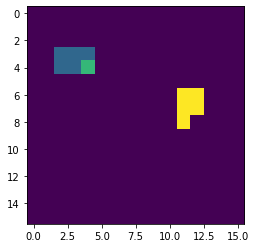

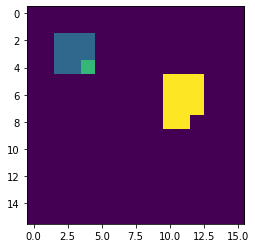

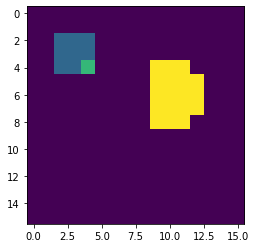

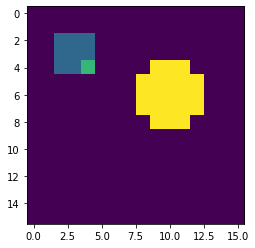

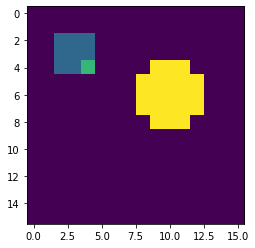

Iterations: 5


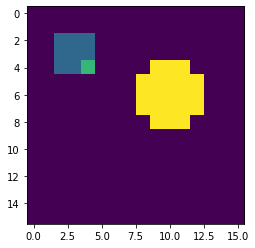

In [57]:
#3 points
seedX=[4,4,7]
seedY=[3,4,12]
Result = GrowRegs(img, seedX, seedY, mode='FULL')
plt.imshow(Result)
plt.show()

### Teste 02

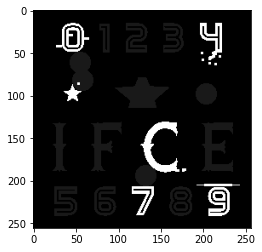

In [58]:
img = cv.imread("../gcPDI2/imgPDI2/gcmyshapes2.tif",0)
plt.imshow(img,'gray')
plt.show()

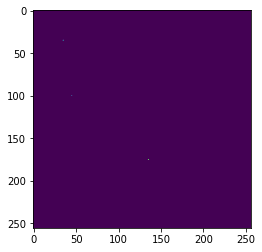

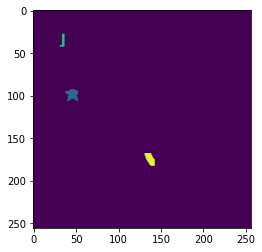

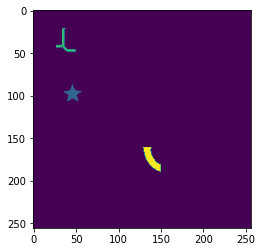

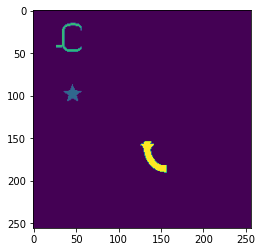

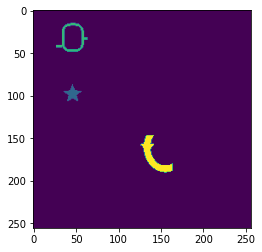

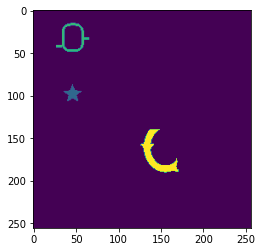

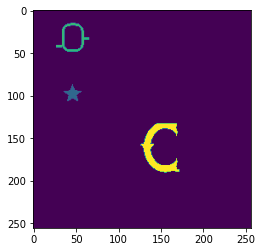

Iterations: 45
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


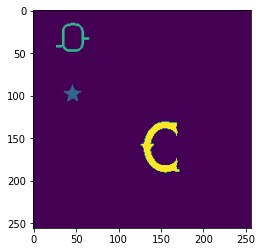

In [67]:
#3 points
seedX=[100,35,175]
seedY=[45,35,135]
Result = GrowRegs(img, seedX, seedY, mode='FULL', steps=7)
plt.imshow(Result)
plt.show()

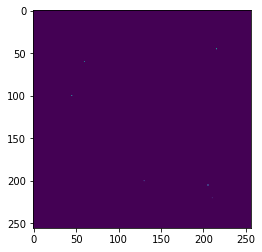

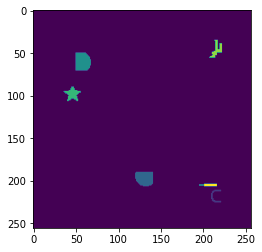

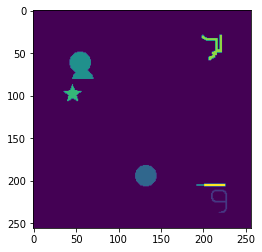

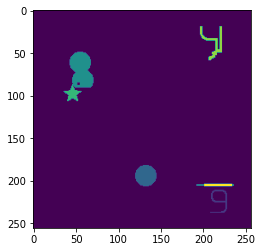

Iterations: 38


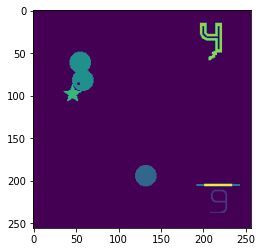

In [66]:
#6 points
seedX=[220,200,60,100,45,205]
seedY=[210,130,60,45,215,205]
Result = GrowRegs(img, seedX, seedY, mode='FULL', steps=10)
plt.imshow(Result)
plt.show()

## Conclusão

Comparando com a **Limiarização por Média Móvel**, esse método permite diferenciar objetos de interesse de outros objetos e do fundo. Abordando o método focando na imagem como matriz, é possível implementar funções para contornar os objetos obtidos, salvar as coordenadas em que cada objeto segmentado se encontra, fragmentar e isolar cada objeto em uma camada diferente, etc..

A abordagem escolhida foi de extrair uma matriz onde os valores de intensidade 0 são considerado fundo, e cada valor maior do que 0 é um objeto obtido a partir de uma semente. Com essa matriz, pode-se escolher como colorir cada valor ou implementar uma função que retorna uma matriz B[k] e B[k-1], onde a subtração de uma pela outra retornaria só o contorno.

Como a abordagem foi feita para ter possibilidade de mostrar passo-a-passo, a dificuldade se encontra em otimizar o método para diminuir seu tempo de processamento.

## Fontes

https://coronavirus.butantan.gov.br/veja-o-coronavirus

SONKA, Milan; HLAVAC, Vaclav; BOYLE, Roger. **Image Processing, Analysis, and Machine Vision.** 4. ed. Stamford: Cengage Learning, 2015.

GONZALEZ, Rafael.; WOODS, Richard. **Digital Image Processing**. 3. ed. Upper Saddle River: Pearson, 2008.
